# **Loading Dataset**

In [ ]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BDMH Project/heart.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
uci_data = pd.read_csv('/content/drive/MyDrive/BDMH Project/processed.cleveland.data', sep=",",encoding= 'unicode_escape',header = None)

In [ ]:
uci_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
uci_data.rename(columns={0:'age',
                          1:'sex',
                         2:'cp',
                         3:'trestbps',
                         4: 'chol',
                         5:'fbs',
                         6:'restecg',
                         7:'thalach',
                         8:'exang',
                         9:'oldpeak',
                         10:'slope',
                         11:'ca',
                         12:'thal',
                         13:'num'}, 
                 inplace=True)

In [ ]:
uci_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# **Data Analysis**

In [ ]:
uci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
uci_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
uci_data.num.unique()

array([0, 2, 1, 3, 4])

In [ ]:
data.target.unique()

array([1, 0])

In [ ]:
numerical_data = (data.dtypes == "int64")
numerical_data_list = list(numerical_data[numerical_data].index)

print("Categorical variables:")
print(numerical_data_list)

Categorical variables:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal', 'target']


**Freq-Distribution of columns in data**

In [ ]:
def plot_histogram(column_name):
    sns.set_theme( style = 'darkgrid',palette="pastel")
    plt.figure(figsize = (9,3))
    plt.hist(data[column_name], bins = 50)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title("{} distribution".format(column_name))
    plt.show()


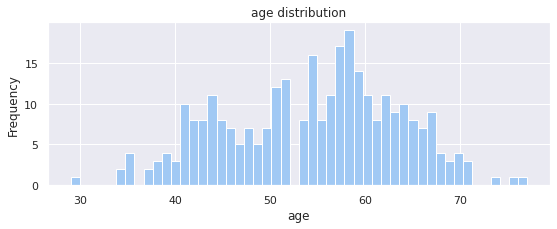

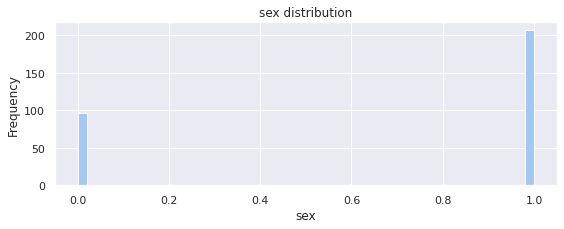

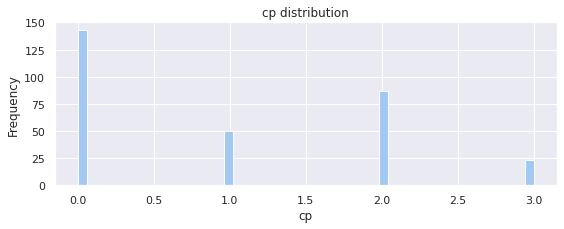

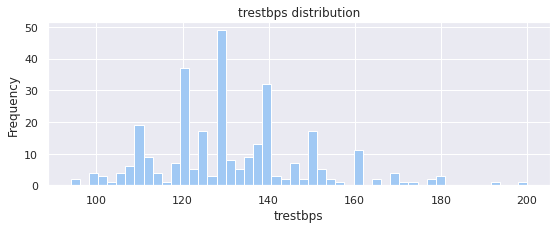

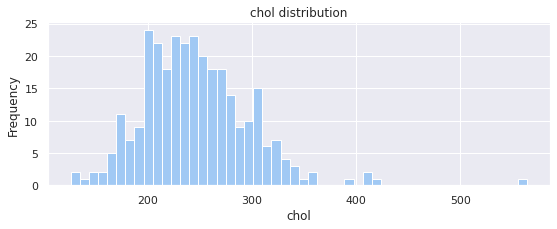

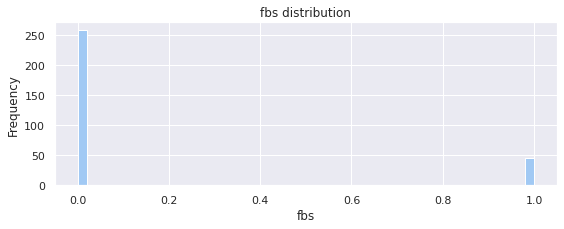

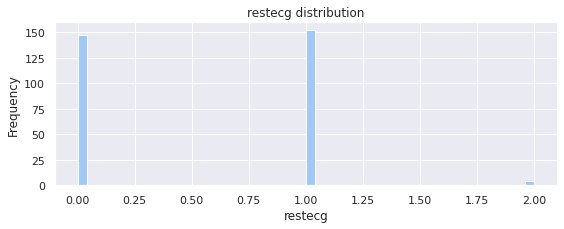

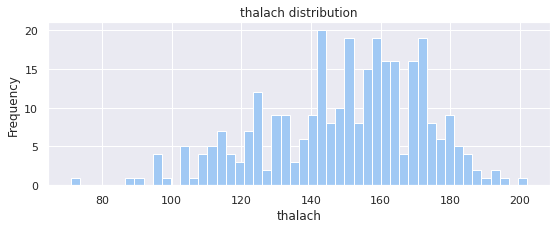

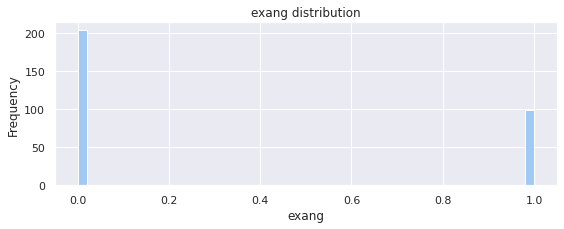

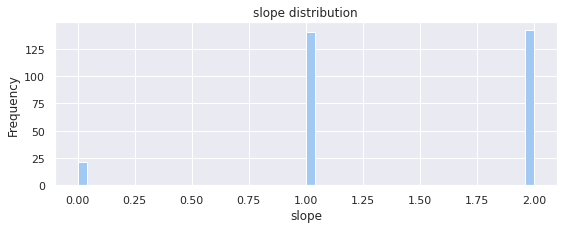

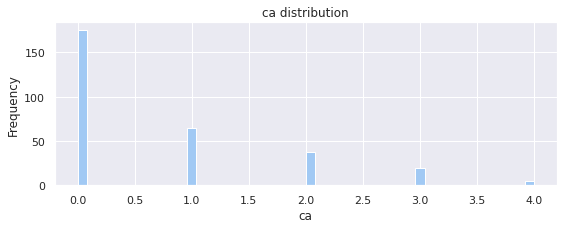

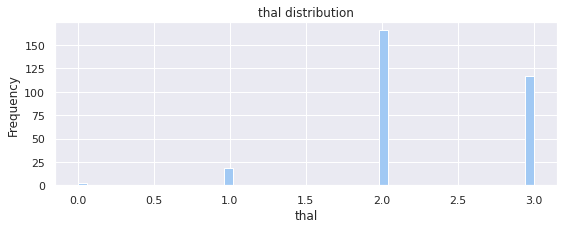

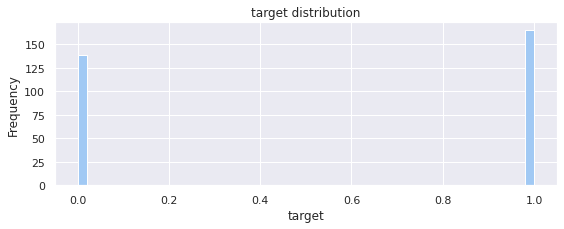

In [ ]:
for d in numerical_data_list:
    plot_histogram(d)

# **Distribution of features w.r.t target**

***Age***

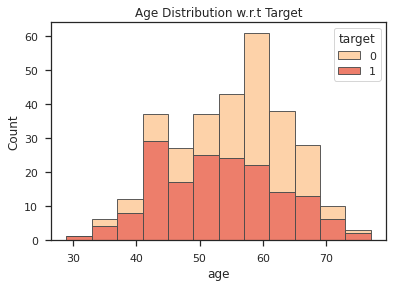

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize = (6,4))
sns.histplot(
    data,
    x="age", hue="target",
    multiple="stack",
    palette="OrRd",
    edgecolor=".3",
    linewidth=.9,
)
plt.title("Age Distribution w.r.t Target")
plt.show()
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
# 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 
# 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
# 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
# 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma'

In [ ]:
data[["sex","target"]].groupby(["sex"], as_index = False).mean().sort_values(by="target",ascending = False)

,sex,target
0,0,0.750000
1,1,0.449275


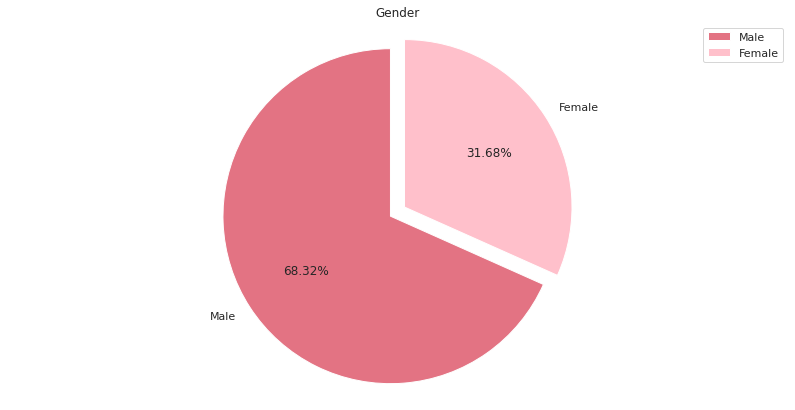

In [ ]:

plt.figure(figsize=(14, 7))
labels=['Male', 'Female']
plt.pie(data['sex'].value_counts(),labels=labels,explode=[0.05,0.05],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.legend()
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Sex Distribution w.r.t Target')

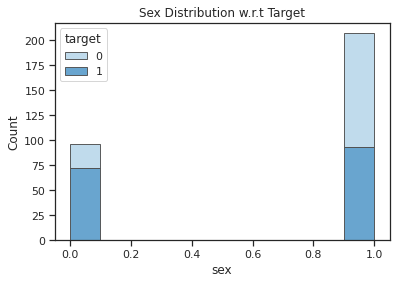

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize = (6,4))
sns.histplot(
    data,
    x="sex", hue="target",
    multiple="stack",
    palette="Blues",
    edgecolor=".3",
    linewidth=.9,
)
plt.title("Sex Distribution w.r.t Target")

Text(0.5, 1.0, 'Chest pain type Distribution w.r.t Target')

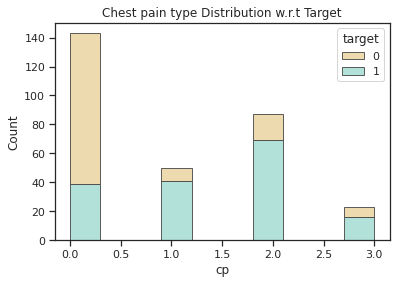

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize = (6,4))
sns.histplot(
    data,
    x="cp", hue="target",
    multiple="stack",
    palette="BrBG",
    edgecolor=".3",
    linewidth=.9,
)
plt.title("Chest pain type Distribution w.r.t Target")

Text(0.5, 1.0, 'trestbps Distribution w.r.t Target')

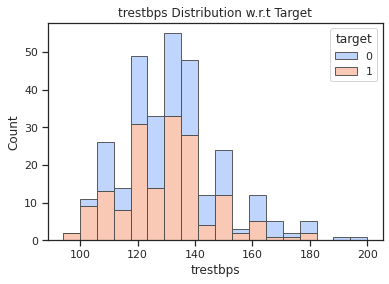

In [ ]:
sns.set_theme(style="ticks")
plt.figure(figsize = (6,4))
sns.histplot(
    data,
    x="trestbps", hue="target",
    multiple="stack",
    palette="coolwarm",
    edgecolor=".3",
    linewidth=.9,
)
plt.title("trestbps Distribution w.r.t Target")

In [ ]:
def dis_v(column_name,cmap):
  sns.set_theme(style="ticks")
  plt.figure(figsize = (6,4))
  sns.histplot(
      data,
      x=column_name, hue="target",
      multiple="stack",
      palette=cmap,
      edgecolor=".3",
      linewidth=.9,
  )
  plt.title(column_name+" "+"Distribution w.r.t Target")
  plt.show()

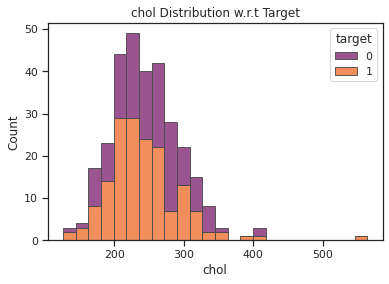

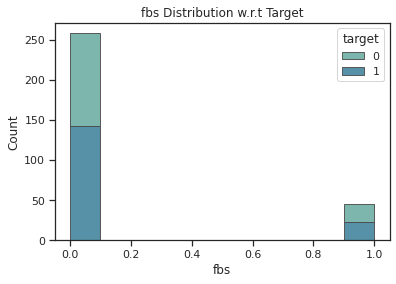

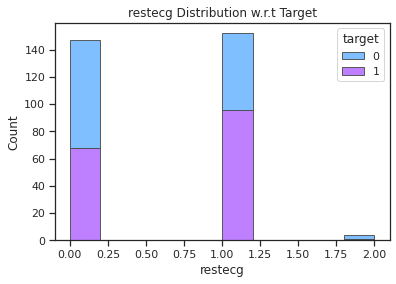

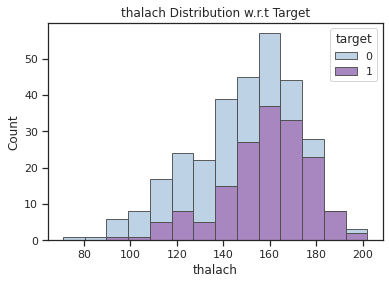

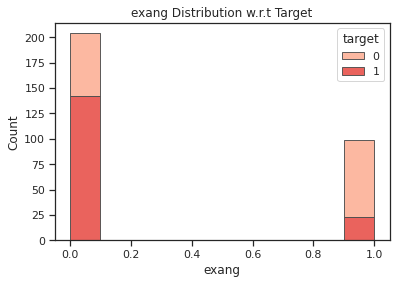

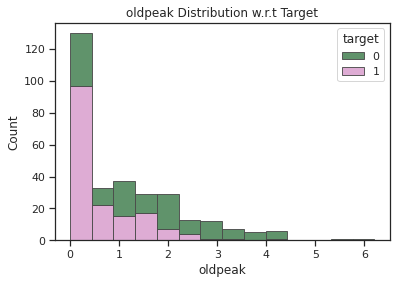

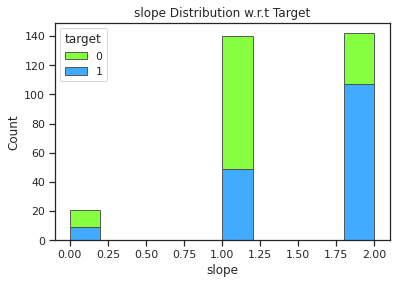

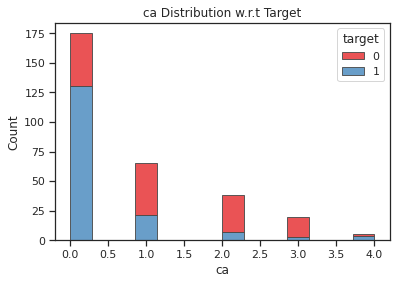

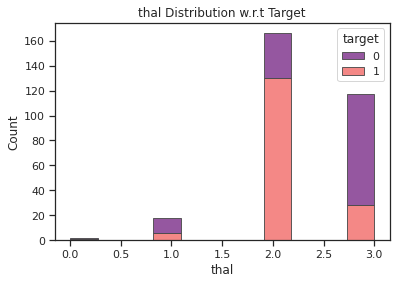

In [ ]:
dis_v("chol","inferno")
dis_v("fbs","crest")
dis_v("restecg","cool")
dis_v("thalach","BuPu")
dis_v("exang","Reds")
dis_v("oldpeak","cubehelix")
dis_v("slope","gist_rainbow")
dis_v("ca","Set1")
dis_v("thal","magma")

<bound method DataFrame.count of                Sequence  label
0     XXXXXXXXSEVSDTNLY      0
1     XXXXXXXSEVSDTNLYS      0
2     XXXXXXSEVSDTNLYSP      0
3     XXXXXSEVSDTNLYSPF      0
4     XXXXSEVSDTNLYSPFK      0
...                 ...    ...
6271  PDYAGSSGRIVTDXXXX      0
6272  DYAGSSGRIVTDXXXXX      0
6273  YAGSSGRIVTDXXXXXX      0
6274  AGSSGRIVTDXXXXXXX      0
6275  GSSGRIVTDXXXXXXXX      0

[6276 rows x 2 columns]>


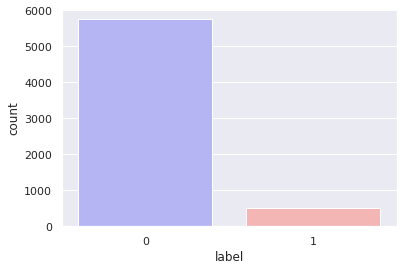

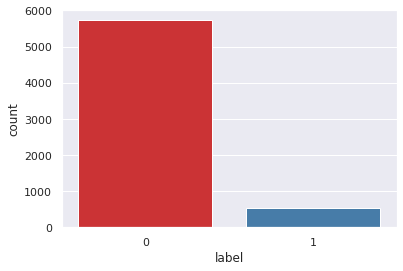

In [ ]:
import pandas as pd

data = pd.read_csv('85380.csv')
# print(data)
print(data.count)
sns.countplot(x="label", data=data, palette="bwr")
plt.show()

data = pd.read_csv('/content/submission.csv')
# print(data)
sns.countplot(x="label", data=data, palette="Set1")
plt.show()

In [ ]:
features = data.columns
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


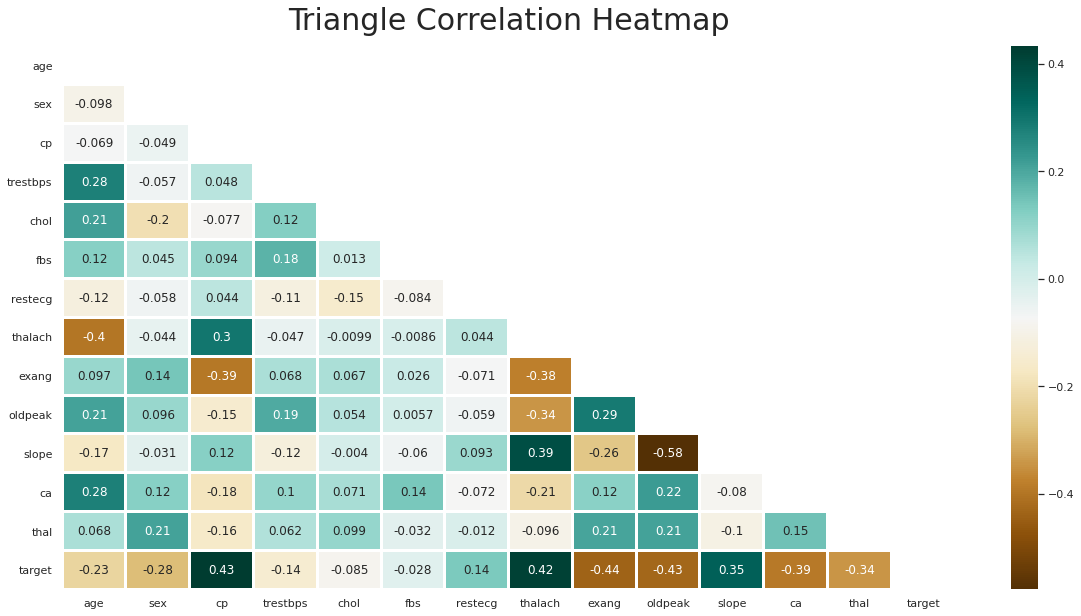

In [ ]:
#Triangle Corelation Heatmap
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Preprocessing**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
cols = list(data.columns)
print('all_features = ',cols)
cols.remove('age')
cols.remove('trestbps')
cols.remove('chol')
cols.remove('thalach')
cols.remove('oldpeak')

cols.remove('sex')
cols.remove('fbs')
cols.remove('exang')
cols.remove('target')
cols.remove('ca')  # number of major vessels (0-3) colored by flourosopy

print('cat_features = ',cols)
cat_features = cols

all_features =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
cat_features =  ['cp', 'restecg', 'slope', 'thal']


In [ ]:
for a in cat_features:
    print(a, set(data[a]))

cp {0, 1, 2, 3}
restecg {0, 1, 2}
slope {0, 1, 2}
thal {0, 1, 2, 3}


In [ ]:
a = pd.get_dummies(data['cp'], prefix = "cp",drop_first=True)
b = pd.get_dummies(data['thal'], prefix = "thal",drop_first=True)
c = pd.get_dummies(data['slope'], prefix = "slope",drop_first=True)
d = pd.get_dummies(data['restecg'], prefix = 'restecg',drop_first=True)

In [ ]:
frames = [data, a, b, c, d]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1,1,0,0,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0,0,1,0,0,1,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1,0,0,1,1,0


In [ ]:
data = data.drop(columns = ['cp', 'thal', 'slope', 'restecg'])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,0,1,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,0,1,1,0


# **Classification**

In [ ]:
X = data.drop('target', axis=1)
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X, y, test_size=.2, random_state =0)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

In [ ]:
def evaluation(y_test,y_pred,model_name,cmap = "Blues"):

  #   1. Accuracy : 
  print("\n\n1. Accuracy ")
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print("\t"+model_name+" Accuracy: %.2f%%" % (accuracy * 100.0))

  #   2. Confusion Matrix
  print("\n\n2. Confusion Matrix")
  from sklearn import metrics

  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(cnf_matrix, annot=True,cmap=cmap)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title("Confusion Matrix")
  plt.show()

  # 3. Classification error
  print("\n\n3. Classification error")
  TP = cnf_matrix[1, 1]
  TN = cnf_matrix[0, 0]
  FP = cnf_matrix[0, 1]
  FN = cnf_matrix[1, 0]

  classification_error = (FP + FN) / float(TP + TN + FP + FN)
  ce = 1 - metrics.accuracy_score(y_test, y_pred)

  print("\t"+model_name+" Classification error : {:.4f}".format(classification_error))
  print("\t"+model_name+" classification error from accuracy_score : {:.4f}".format(ce))

  #  4. Sensitivity 
  print("\n\n4. Sensitivity")
  sensitivity = TP / float(FN + TP)
  print("\t"+model_name+" Sensitivity : {:.4f}".format(sensitivity))
  print("\t"+model_name+" recall : {:.4f}".format(metrics.recall_score(y_test, y_pred)))

  #  5. Specificity
  print("\n\n5. Specificity")
  specificity = TN / (TN + FP)

  print("\t"+model_name+" Specificity : {:.4f}".format(specificity))

  # 6. Precision
  print("\n\n6. Precision")
  precision = TP / float(TP + FP)
  print("\t"+model_name+" Precision from cnf : {:.4f}".format(precision))
  print("\t"+model_name+" Precision score : {:.4f}".format(metrics.precision_score(y_test, y_pred)))

  # 7. F1-Score
  print("\n\n7. F1-Score")
  from sklearn.metrics import f1_score
  print("\t"+model_name+" F1-Score : {:.4f}".format(f1_score(y_test,y_pred)))

  

  print("--------------------------------------------------------------")


**Naive Bayes**








--------------Evaluation of Guassian Naive Bayes model---------------------


1. Accuracy 
	Guassian NB Accuracy: 86.89%


2. Confusion Matrix


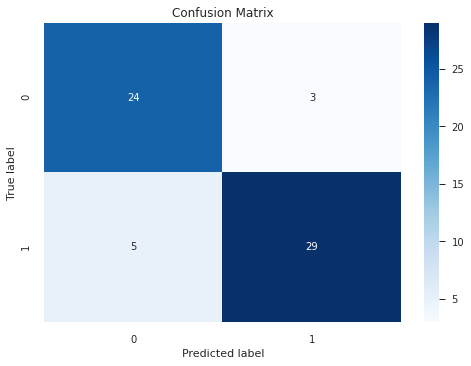



3. Classification error
	Guassian NB Classification error : 0.1311
	Guassian NB classification error from accuracy_score : 0.1311


4. Sensitivity
	Guassian NB Sensitivity : 0.8529
	Guassian NB recall : 0.8529


5. Specificity
	Guassian NB Specificity : 0.8889


6. Precision
	Guassian NB Precision from cnf : 0.9062
	Guassian NB Precision score : 0.9062


7. F1-Score
	Guassian NB F1-Score : 0.8788
--------------------------------------------------------------


8. ROC Curve


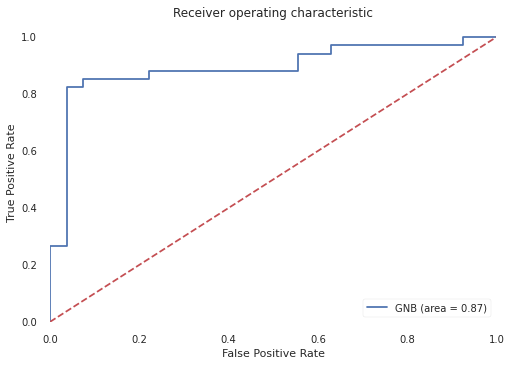

In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

#--------------Evaluation of model---------------------
print("--------------Evaluation of Guassian Naive Bayes model---------------------")
evaluation(y_test,y_pred,"Guassian NB","Blues")
# 8. ROC Curve
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'GNB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**MultiNomial NB**

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

# #--------------Evaluation of model---------------------
# print("--------------Evaluation of Multinomial Naive Bayes model---------------------")
# evaluation(y_test,y_pred,"Multinomial NB","Reds")

**Logistic Regression**

-------------- Evaluation of Logistic Regression Model ------------


1. Accuracy 
	Logistic Regression Accuracy: 85.25%


2. Confusion Matrix


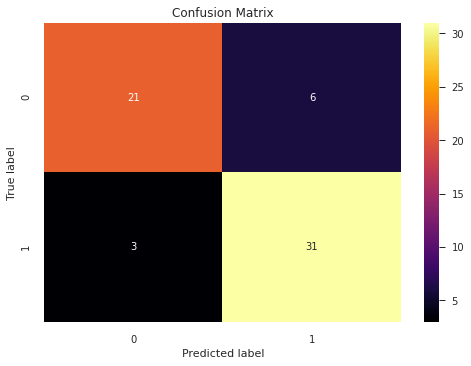



3. Classification error
	Logistic Regression Classification error : 0.1475
	Logistic Regression classification error from accuracy_score : 0.1475


4. Sensitivity
	Logistic Regression Sensitivity : 0.9118
	Logistic Regression recall : 0.9118


5. Specificity
	Logistic Regression Specificity : 0.7778


6. Precision
	Logistic Regression Precision from cnf : 0.8378
	Logistic Regression Precision score : 0.8378


7. F1-Score
	Logistic Regression F1-Score : 0.8732
--------------------------------------------------------------


8. ROC Curve


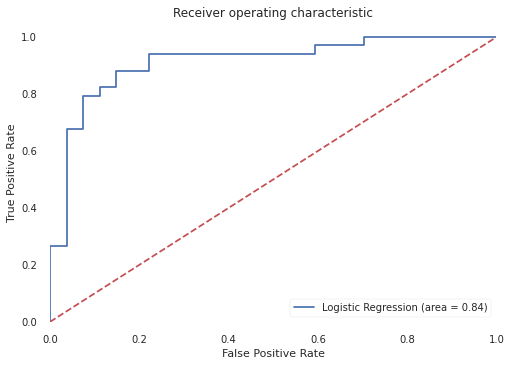

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred1 = clf.predict(x_test)

#-------------- Evaluation of Logistic Regression Model ----------
print("-------------- Evaluation of Logistic Regression Model ------------")
evaluation(y_test,y_pred1,"Logistic Regression","inferno")
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**RandomForest**

-------------- Evaluation of Random Forest Model ------------


1. Accuracy 
	Random Forest Accuracy: 86.89%


2. Confusion Matrix


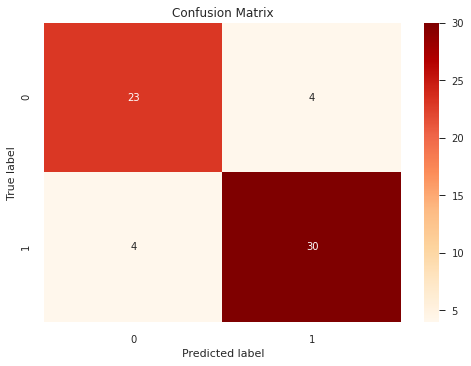



3. Classification error
	Random Forest Classification error : 0.1311
	Random Forest classification error from accuracy_score : 0.1311


4. Sensitivity
	Random Forest Sensitivity : 0.8824
	Random Forest recall : 0.8824


5. Specificity
	Random Forest Specificity : 0.8519


6. Precision
	Random Forest Precision from cnf : 0.8824
	Random Forest Precision score : 0.8824


7. F1-Score
	Random Forest F1-Score : 0.8824
--------------------------------------------------------------


8. ROC Curve


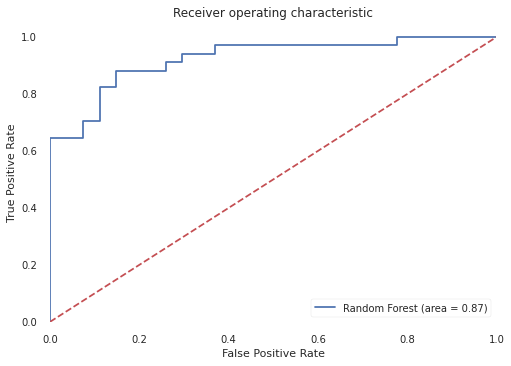

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
clf_rf.fit(x_train, y_train)
y_pred2 = clf_rf.predict(x_test)

#-------------- Evaluation of Random Forest Model ----------
print("-------------- Evaluation of Random Forest Model ------------")
evaluation(y_test,y_pred2,"Random Forest","OrRd")
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, clf_rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Gradient Boosting (XGBoost)**

-------------- Evaluation of XGBoost Model ------------


1. Accuracy 
	XGBoost Accuracy: 85.25%


2. Confusion Matrix


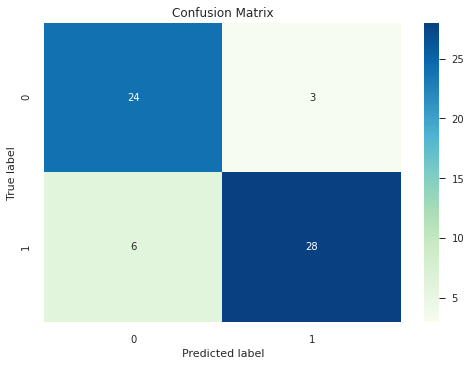



3. Classification error
	XGBoost Classification error : 0.1475
	XGBoost classification error from accuracy_score : 0.1475


4. Sensitivity
	XGBoost Sensitivity : 0.8235
	XGBoost recall : 0.8235


5. Specificity
	XGBoost Specificity : 0.8889


6. Precision
	XGBoost Precision from cnf : 0.9032
	XGBoost Precision score : 0.9032


7. F1-Score
	XGBoost F1-Score : 0.8615
--------------------------------------------------------------


8. ROC Curve


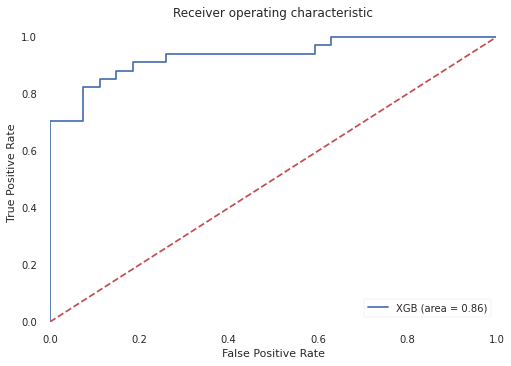

In [ ]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)
y_pred4 = clf_xgb.predict(x_test)

#-------------- Evaluation of XGBoost Model ----------
print("-------------- Evaluation of XGBoost Model ------------")
evaluation(y_test,y_pred4,"XGBoost","GnBu")
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred4)
fpr, tpr, thresholds = roc_curve(y_test, clf_xgb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'XGB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Decision Tree**

-------------- Evaluation of Decision Tree Model ------------


1. Accuracy 
	Decision Tree Accuracy: 78.69%


2. Confusion Matrix


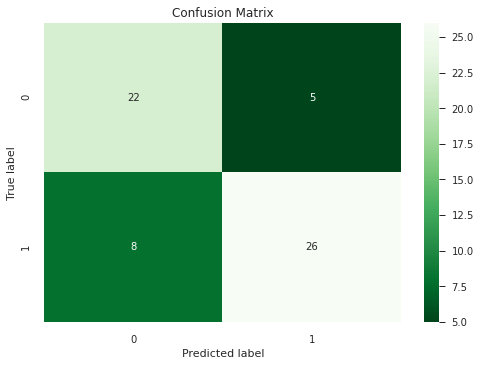



3. Classification error
	Decision Tree Classification error : 0.2131
	Decision Tree classification error from accuracy_score : 0.2131


4. Sensitivity
	Decision Tree Sensitivity : 0.7647
	Decision Tree recall : 0.7647


5. Specificity
	Decision Tree Specificity : 0.8148


6. Precision
	Decision Tree Precision from cnf : 0.8387
	Decision Tree Precision score : 0.8387


7. F1-Score
	Decision Tree F1-Score : 0.8000
--------------------------------------------------------------


8. ROC Curve


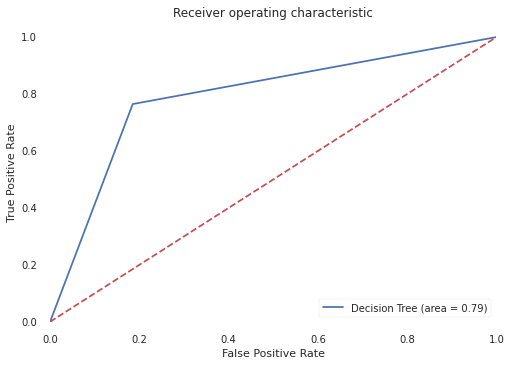

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(random_state=0)
classifier1.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)

#-------------- Evaluation of Decision Tree Model ----------
print("-------------- Evaluation of Decision Tree Model ------------")
evaluation(y_test,y_pred,"Decision Tree","Greens_r")
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**SVM**

-------------- Evaluation of SVM ------------


1. Accuracy 
	SVM Accuracy: 85.25%


2. Confusion Matrix


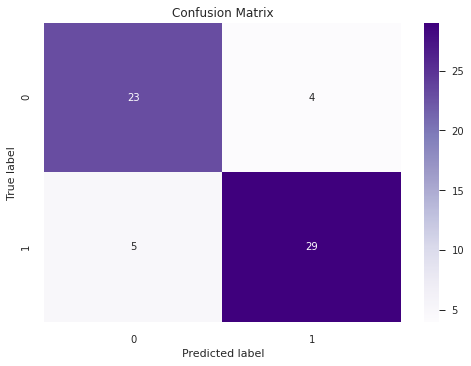



3. Classification error
	SVM Classification error : 0.1475
	SVM classification error from accuracy_score : 0.1475


4. Sensitivity
	SVM Sensitivity : 0.8529
	SVM recall : 0.8529


5. Specificity
	SVM Specificity : 0.8519


6. Precision
	SVM Precision from cnf : 0.8788
	SVM Precision score : 0.8788


7. F1-Score
	SVM F1-Score : 0.8657
--------------------------------------------------------------


8. ROC Curve


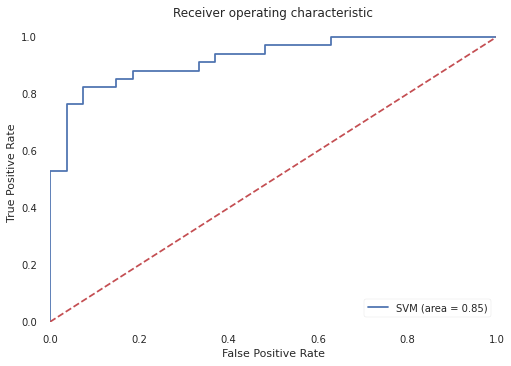

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0 ,probability=True)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
#-------------- Evaluation of SVM Model ----------
print("-------------- Evaluation of SVM ------------")
evaluation(y_test,y_pred,"SVM","Purples")
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**KNN**

Maximum KNN Score is 88.52%


1. Accuracy 
	KNN Accuracy: 88.52%


2. Confusion Matrix


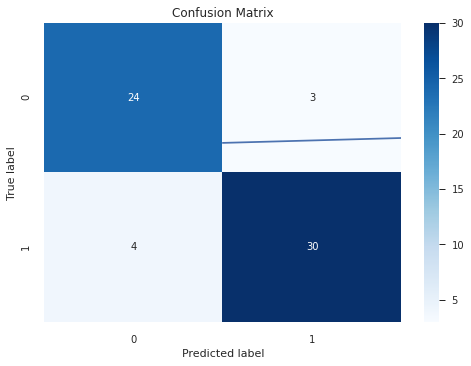



3. Classification error
	KNN Classification error : 0.1148
	KNN classification error from accuracy_score : 0.1148


4. Sensitivity
	KNN Sensitivity : 0.8824
	KNN recall : 0.8824


5. Specificity
	KNN Specificity : 0.8889


6. Precision
	KNN Precision from cnf : 0.9091
	KNN Precision score : 0.9091


7. F1-Score
	KNN F1-Score : 0.8955
--------------------------------------------------------------


8. ROC Curve


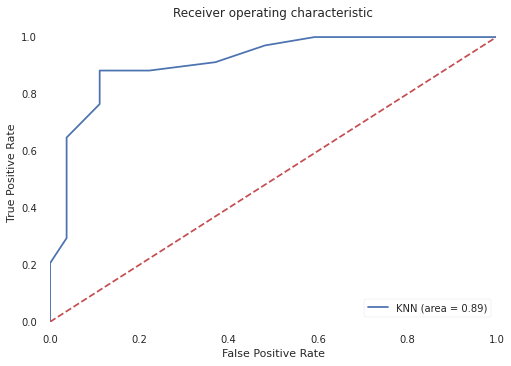

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scoreList = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,2))
plt.xlabel("K value")
plt.ylabel("Score")

acc = max(scoreList)*100
# accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

knn2 = KNeighborsClassifier(n_neighbors = 19)  # n_neighbors means k
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)
evaluation(y_test,y_pred,"KNN","Blues")
print("\n\n8. ROC Curve")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')


# **Results**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Classifier', 'Accuracy','Classification Error ','Precision','F-measure','Sensitivity','Specificity']),
                 cells=dict(values=[["Guassian Naive Bayes","Logistic Regression","Random Forest","XG Boost","Decision Tree","SVM","KNN"], 
                                    [86.89,85.25,86.89,85.25,78.69,85.25,88.52],[13.1,14.8,13.1,14.8,21.31,14.8,11.48],[90.6,83.8,88.2,90.3,83.87,87.9,90.91],[87.9,87.3,88.2,86.2,80.00,86.6,89.55],[85.3,91.2,88.2,82.4,76.47,85.3,88.24],[88.9,77.8,85.2,88.9,81.48,85.2,88.89]]))
                     ])
fig.show()

In [ ]:
N = len(models)
ind = np.arange(N) 
width = 0.25
xvals = acc
bar1 = plt.bar(ind, xvals, width, color = "pink",edgecolor = 'k')
  
yvals = ce
bar2 = plt.bar(ind+width, yvals, width, color="orange",edgecolor = 'k')
  
plt.xlabel("")
plt.ylabel('')
plt.title("Performance evaluation of models")
plt.ylim(0.0, 100.0)  
plt.xticks(ind+width,models,rotation=70)
plt.legend( (bar1, bar2), ('Accuracy', 'Classification error'),bbox_to_anchor=(0.75, 0., 0.75, 0.5))
plt.show()

In [ ]:
models = ["GNB","LR","RF","XGB","DT","SVM","KNN"]
acc = [86.89,85.25,86.89,85.25,78.69,85.25,88.52]
ce = [13.1,14.8,13.1,14.8,21.31,14.8,11.48]
p = [90.6,83.8,88.2,90.3,83.87,87.9,90.91]
f = [87.9,87.3,88.2,86.2,80.00,86.6,89.55]
sens = [85.3,91.2,88.2,82.4,76.47,85.3,88.24]
sep = [88.9,77.8,85.2,88.9,81.48,85.2,88.89]

In [ ]:
names = list(f1_dict.keys())
values = list(f1_dict.values())
plt.figure(figsize=(13,6))
plt.ylim([50,100])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison among models")

plt.bar(range(len(f1_dict)), values, tick_label=names,color = 'rgbkymc',width=0.5)
plt.show()